<a href="https://colab.research.google.com/github/Mihika-J/DS-EXPS/blob/main/DS_EXP_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Embedded methods perform feature selection and training of the algorithm in parallel. In other words, the feature selection process is an integral part of the classification/regressor model.**


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [6]:
# Load the Iris dataset
iris_data = pd.read_csv("iris.csv")

# Separate features and target
X = iris_data.iloc[:, :-1]  # All columns except the last one
y = iris_data.iloc[:, -1]   # The last column (Species)

# Convert target labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**1.Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that includes a regularization term to prevent overfitting and perform feature selection. It is particularly useful in high-dimensional datasets with many features, as it can reduce the number of features used in the final model by shrinking some feature coefficients to exactly zero.**

In [7]:
# --- Lasso Regression (L1 Regularization) ---
print("Lasso Regression Feature Selection")
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Select features where Lasso coefficients are non-zero
lasso_model = SelectFromModel(lasso, prefit=True)
X_train_lasso = lasso_model.transform(X_train)
X_test_lasso = lasso_model.transform(X_test)

# Get feature names selected by Lasso
lasso_selected_features = X.columns[(lasso.coef_ != 0)]
print("Features selected by Lasso:", list(lasso_selected_features))

Lasso Regression Feature Selection
Features selected by Lasso: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


**2.Ridge Regression is a type of linear regression that adds an L2 regularization term to penalize large coefficients, reducing overfitting without shrinking coefficients to zero.**

In [8]:
print("\nRidge Regression Feature Selection")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_coefs = pd.Series(ridge.coef_, index=X.columns)
ridge_selected_features = ridge_coefs[ridge_coefs.abs() > 0.1].index  # Threshold can be adjusted
print("Top features selected by Ridge:", list(ridge_selected_features))


Ridge Regression Feature Selection
Top features selected by Ridge: ['sepal.length', 'petal.length', 'petal.width']


**3.EN regression model is trained using the response variable and pre-selected features as input data.**

In [9]:
print("\nElastic Net Feature Selection")
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

elastic_net_model = SelectFromModel(elastic_net, prefit=True)
X_train_elastic = elastic_net_model.transform(X_train)
X_test_elastic = elastic_net_model.transform(X_test)

elastic_net_selected_features = X.columns[(elastic_net.coef_ != 0)]
print("Features selected by Elastic Net:", list(elastic_net_selected_features))
print("\nRidge Regression Feature Selection")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_coefs = pd.Series(ridge.coef_, index=X.columns)
ridge_selected_features = ridge_coefs[ridge_coefs.abs() > 0.1].index  # Threshold can be adjusted
print("Top features selected by Ridge:", list(ridge_selected_features))


Elastic Net Feature Selection
Features selected by Elastic Net: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

Ridge Regression Feature Selection
Top features selected by Ridge: ['sepal.length', 'petal.length', 'petal.width']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Random Forest Feature Importance


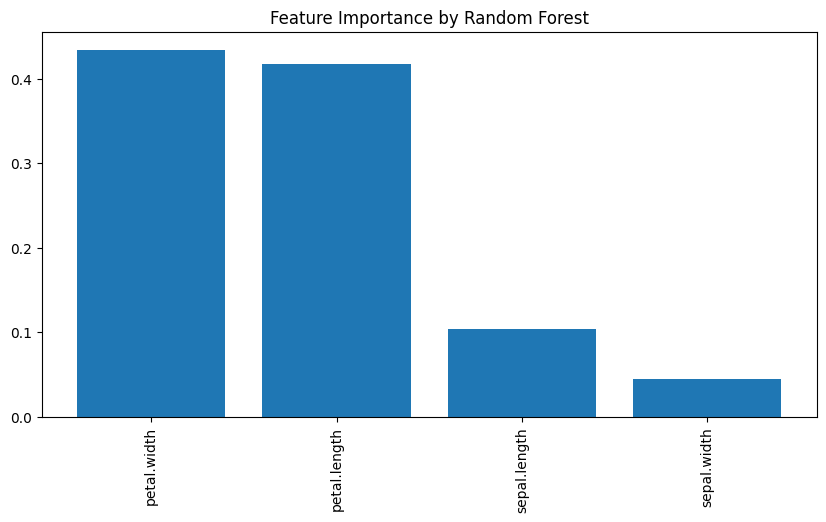

Top features selected by Random Forest: ['petal.width', 'petal.length']


In [10]:
print("\nRandom Forest Feature Importance")
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importance by Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# Get top features from Random Forest
forest_selected_features = X.columns[indices[:2]]  # Top 2 features
print("Top features selected by Random Forest:", list(forest_selected_features))